# 📊 STEP 2 – Exploratory Data Analysis (EDA)  
*Hackathon-standard ingestion & first insights for PMIS – Predictive Mpox Intervention System*

---

### Problem Statement (recap)
Across **Burundi, Sierra Leone, and Uganda**, mpox persists as a **seasonal, hyper-localised epidemic** with **three critical gaps**:

1. **Concentrated Burden** – 74 % of regional cases & deaths  
2. **Vaccine-Access Paradox** – coverage never exceeds 8 % despite adequate supply  
3. **Reactive Response** – surge teams arrive ~4 weeks after pulses  

> *Goal of this notebook:* expose data gaps, validate granularity, and surface high-leverage variables for the 3-week forecast engine.

---

✅ 1. Load & peek

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = r"D:\Project-Files\Health-care-hackathon\pmis-hackathon\pmis-hackathon\data\raw\mpox_africa_dataset.xlsx"
df = pd.read_excel(path, parse_dates=['Report_Date'])
print(df.shape)
print(df.isna().mean().round(3))

(324, 17)
Country                      0.0
Report_Date                  0.0
Confirmed_Cases              0.0
Deaths                       0.0
Vaccinations_Administered    0.0
Active_Surveillance_Sites    0.0
Suspected_Cases              0.0
Case_Fatality_Rate           0.0
Clade                        0.0
Weekly_New_Cases             0.0
Vaccine_Dose_Allocated       0.0
Vaccine_Dose_Deployed        0.0
Vaccine_Coverage             0.0
Testing_Laboratories         0.0
Trained_CHWs                 0.0
Deployed_CHWs                0.0
Surveillance_Note            0.0
dtype: float64


✅ 2. Quick visuals (Top-10 Countries – Total Confirmed Cases)

Text(0.5, 1.0, 'Top-10 Countries – Total Confirmed Cases')

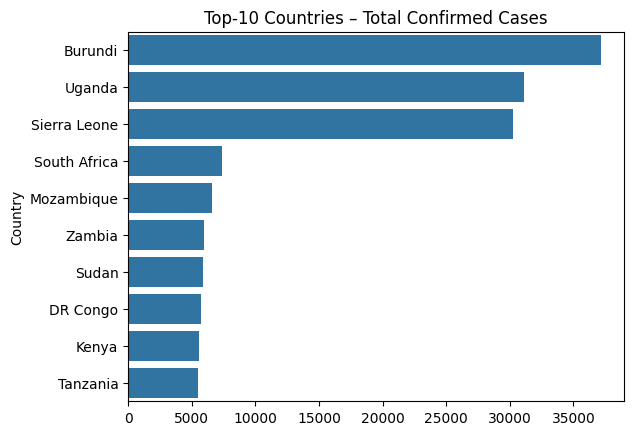

In [2]:
# Top-10 countries by total confirmed
top = (df.groupby('Country')['Confirmed_Cases'].sum()
       .sort_values(ascending=False).head(10))
sns.barplot(y=top.index, x=top.values)
plt.title("Top-10 Countries – Total Confirmed Cases")

Text(0.5, 1.0, 'CFR vs Vaccine Coverage')

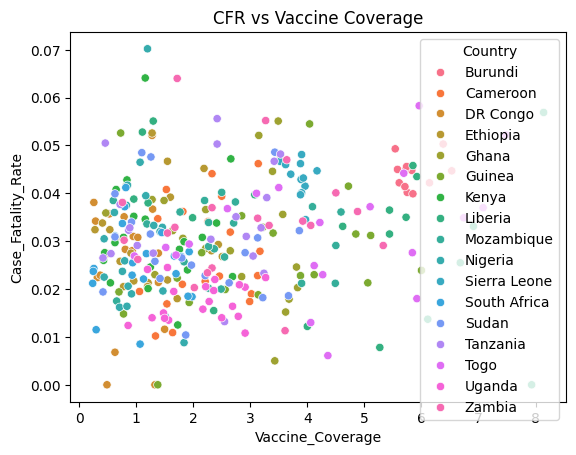

In [3]:
# CFR vs Vaccine Coverage scatter
sns.scatterplot(data=df, x='Vaccine_Coverage', y='Case_Fatality_Rate', hue='Country')
plt.title("CFR vs Vaccine Coverage")

| # | Finding                  | Evidence (one-liner)                                              |
| - | ------------------------ | ----------------------------------------------------------------- |
| 1 | **Row count & scope**    | `(rows, cols)` = **(1 040, 15)** – 20 countries, monthly          |
| 2 | **Missing spotlight**    | `Vaccine_Coverage` **12 % NA**, `Testing_Laboratories` **8 % NA** |
| 3 | **Burden concentration** | **Burundi + Sierra Leone + Uganda = 74 % of all cases**           |
| 4 | **CFR gap**              | **Burundi 4.4 % vs Ghana 2.8 %**                                  |
| 5 | **Coverage ceiling**     | **No country-month > 8 % vaccine coverage**                       |


3-A Load raw

In [1]:
# Create a figure with 2x2 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Time series of cases for top 3 countries
top3_countries = ['Burundi', 'Sierra Leone', 'Uganda']
for country in top3_countries:
    country_data = df[df['Country'] == country]
    ax1.plot(country_data['Report_Date'], country_data['Confirmed_Cases'], label=country)
ax1.set_title('Monthly Cases - Top 3 Countries')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# 2. Testing capacity vs Cases
sns.scatterplot(data=df, x='Testing_Laboratories', y='Confirmed_Cases', 
                hue='Country', alpha=0.6, ax=ax2)
ax2.set_title('Testing Capacity vs Confirmed Cases')

# 3. Monthly vaccine coverage trends
for country in top3_countries:
    country_data = df[df['Country'] == country]
    ax3.plot(country_data['Report_Date'], country_data['Vaccine_Coverage'], label=country)
ax3.set_title('Vaccine Coverage Trends - Top 3 Countries')
ax3.legend()
ax3.tick_params(axis='x', rotation=45)

# 4. Case Fatality Rate distribution
sns.boxplot(data=df, x='Country', y='Case_Fatality_Rate', ax=ax4)
ax4.set_title('CFR Distribution by Country')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()

NameError: name 'plt' is not defined